In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
'''
PREGUNTAS:
1) ¿Es la edad un factor significativo? 
2) ¿Influye el nivel de educación?
3) ¿El nivel de gastos está relacionado con los ingresos del cliente?
4) ¿Entre qué variables hay correlación?
'''

'\nPREGUNTAS:\n1) ¿Es la edad un factor significativo? \n2) ¿Influye el nivel de educación?\n3) ¿El nivel de gastos está relacionado con los ingresos del cliente?\n4) ¿Entre qué variables hay correlación?\n'

In [19]:
# Transformo la variable target para calcular P-Value
def factorize_y(x):
    if x == 'no':
        return 0
    else:
        return 1
    
df['y'] = df.apply(lambda x: factorize_y(x['y']), axis=1)

In [33]:
'''
PREGUNTA 1: ¿Es la edad un factor significativo? 
H0 = La edad no es un factor significativo a la hora de predecir si el cliente adquirira un plazo fijo.
H1 = La edad si es un factor significativo a la hora de predecir si el cliente adquirira un plazo fijo.

Se va a utilizar P-Value para determinar si la edad es un valor significativo. Si P-Value <= .05, se rechaza la hipotesis nula.
Y si P-Valu > .05, no se rechaza la hipotesis nula. En el caso que P-Value < .05, NO significa que la hipotesis alternativa sea
95% probable.

Rta => P-Value < .001. Por lo que, se rechaza la hipotesis nula (H0). 
'''
from scipy import stats

r, p = stats.pearsonr(df.age, df.y)
print('Coeficiente de pearson: ', r)
print('P-Value: ', format(p, '.11f'))

Coeficiente de pearson:  0.030398803040003714
P-Value:  0.00000000068


In [34]:
'''
PREGUNTA 2: ¿Influye el nivel de educación?
'''
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

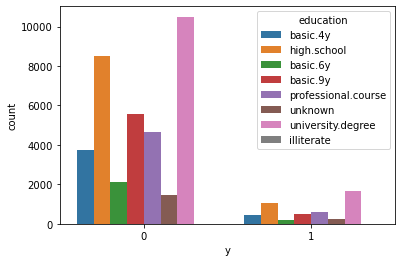

In [42]:
sns.countplot(x='y', hue='education', data=df)